<a href="https://colab.research.google.com/github/danielapavas/Optimizacion/blob/main/Metodo_de_bisecci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MÉTODO DE BISECCIÓN**



In [1]:
import matplotlib.pyplot as plt
import numpy as np


Raíz aproximada: 1.414212942123413


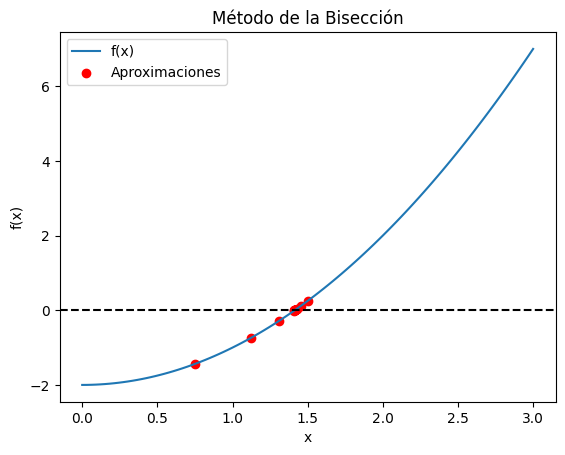


Tabla de datos:
+------------------+----------------------+----------------------+
| Iteración        | Aproximación         | Error                |
+------------------+----------------------+----------------------+
|        1         |      1.50000000      |      0.75000000      |
|        2         |      0.75000000      |      0.37500000      |
|        3         |      1.12500000      |      0.18750000      |
|        4         |      1.31250000      |      0.09375000      |
|        5         |      1.40625000      |      0.04687500      |
|        6         |      1.45312500      |      0.02343750      |
|        7         |      1.42968750      |      0.01171875      |
|        8         |      1.41796875      |      0.00585938      |
|        9         |      1.41210938      |      0.00292969      |
|        10        |      1.41503906      |      0.00146484      |
|        11        |      1.41357422      |      0.00073242      |
|        12        |      1.41430664      |  

In [2]:
def biseccion(funcion, a, b, tolerance, maximo):
    if funcion(a) * funcion(b) >= 0:
        raise ValueError("La función no cumple con el teorema de Bolzano en el intervalo dado.")

    i = 0
    listaError = []
    listaAproximacion = []

    while (b - a) / 2 > tolerance and i < maximo:
        mitad = (a + b) / 2
        listaAproximacion.append(mitad)

        if funcion(mitad) == 0:
            return mitad,listaAproximacion, listaError

        elif funcion(mitad) * funcion(a) < 0:
            b = mitad
        else:
            a = mitad

        error = abs ((b - a) / 2)
        listaError.append(error)
        i += 1

    return (a + b) / 2, listaAproximacion, listaError

#ejemplo
def ejemplo(x):
    return x**2 - 2

a = 0
b = 3
tolerance = 1e-6
maximo = 100

root, listaAproximacion, listaError = biseccion(ejemplo, a, b, tolerance, maximo)
print("\nRaíz aproximada:", root)


# Crear gráfica si hay datos
if listaAproximacion:
    x = np.linspace(a, b, 100)
    y = ejemplo(x)

    plt.plot(x, y, label='f(x)')
    plt.axhline(y=0, color='black', linestyle='--')
    plt.scatter(listaAproximacion, [ejemplo(x) for x in listaAproximacion], color='red', label='Aproximaciones')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.title('Método de la Bisección')
    plt.show()

    # Crear tabla de datos si hay datos
    if listaError:
        print("\nTabla de datos:")
        print("+------------------+----------------------+----------------------+")
        print("| Iteración        | Aproximación         | Error                |")
        print("+------------------+----------------------+----------------------+")
        for i in range(len(listaAproximacion)):
            print(f"| {i+1:^16} | {listaAproximacion[i]:^20.8f} | {listaError[i]:^20.8f} |")
        print("+------------------+----------------------+----------------------+")


# **MÉTODO DE INTERPOLACIÓN CUADRÁTICA**

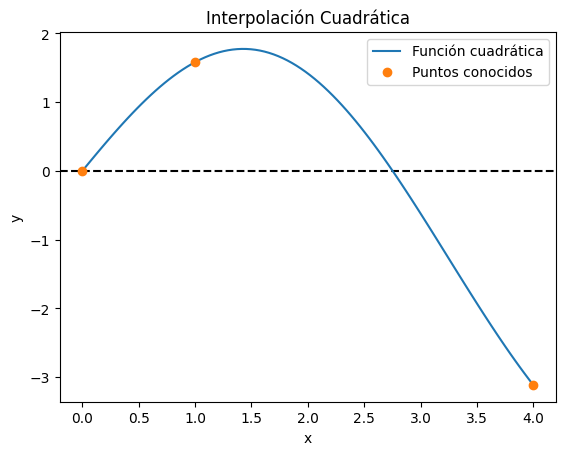


Tabla de datos:
+----+----------------+-----------------+---------------+
| X  | Y              | F(X)            | Error         |
+----+----------------+-----------------+---------------+
| 0  | 0.0000000000   | 0.0000000000000 | 0.0000000000  |
+----+----------------+-----------------+---------------+
| 1  | 1.5829419696   | 1.5829419696158 | 0.0000000000  |
+----+----------------+-----------------+---------------+
| 4  | -3.1136049906   | -3.1136049906159 | 0.0000000000  |
+----+----------------+-----------------+---------------+


In [35]:
# Definir la función cuadrática
def funcionCuadratica(x):
    return 2* np.sin (x) - (x**2)/10 # Cambia los coeficientes según tu función cuadrática

# Datos para evaluar la función
x = np.array([0, 1, 4])
y = funcionCuadratica(x)

# Crear una gráfica de la función cuadrática y los puntos
x_range = np.linspace(min(x), max(x), 100)
y_range = funcionCuadratica(x_range)

plt.axhline(y=0, color='black', linestyle='--')
plt.plot(x_range, y_range, label='Función cuadrática')
plt.plot(x, y, 'o', label='Puntos conocidos')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Interpolación Cuadrática')
plt.show()

# Crear una tabla de datos
if listaError:
  print("\nTabla de datos:")
  print("+----+----------------+-----------------+---------------+")
  print("| X  | Y              | F(X)            | Error         |")
  print("+----+----------------+-----------------+---------------+")
  #print("x\ty\t\tf(x)\t   error")
  for i in range(len(x)):
    print(f"| {x[i]}  | {y[i]:.10f}   | {funcionCuadratica(x[i]):.13f} | {y[i] - funcionCuadratica(x[i]):.10f}  |")
    print("+----+----------------+-----------------+---------------+")

# **MÉTODO DE LA SECCIÓN DORADA**

Mínimo aproximado en x: -1.7463295278245226
Valor mínimo: -2.274233810556349


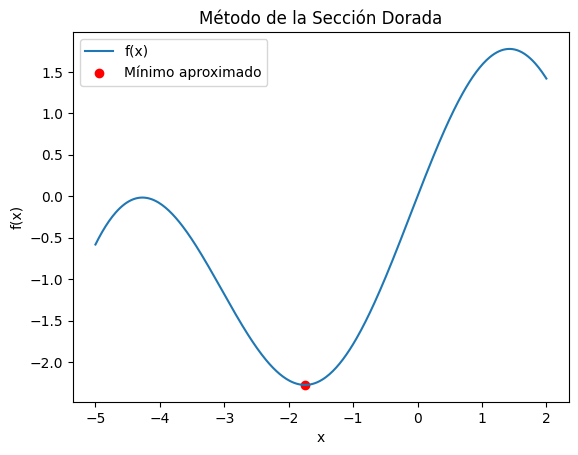


Tabla de datos:
+------------------+----------------------+----------------------+---------------------+----------------------+
| Iteración        | a                    | b                    | Mínimo aproximado   | Error                |
+------------------+----------------------+----------------------+----------------------+---------------------+
|      Final       |     -5.00000000      |      2.00000000      |     -1.74632953      |         N/A          |
+------------------+----------------------+----------------------+----------------------+---------------------+


In [45]:
def seccionDorada(funcion, a, b, tolerancia, maximo):
    phi = (1 + np.sqrt(5)) / 2

    for i in range(maximo):
        x1 = b - (b - a) / phi
        x2 = a + (b - a) / phi

        if funcion(x1) < funcion(x2):
            b = x2
        else:
            a = x1

        if abs(b - a) < tolerancia:
            break

    minimo_X = (a + b) / 2
    minimoValor = funcion(minimo_X)

    return minimo_X, minimoValor

# Función de ejemplo
def ejemplo(x):
    return 2*np.sin(x)-(x**2)/10

a = -5.0
b = 2.0
tolerancia = 1e-6
maximo = 100

minimo_X, minimoValor = seccionDorada(ejemplo, a, b, tolerancia, maximo)
print("Mínimo aproximado en x:", minimo_X)
print("Valor mínimo:", minimoValor)

# Crear gráfica
x_valor = np.linspace(a, b, 400)
y_valor = ejemplo(x_valor)

plt.plot(x_valor, y_valor, label='f(x)')
plt.scatter(minimo_X, minimoValor, color='red', label='Mínimo aproximado')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title('Método de la Sección Dorada')
plt.show()

# Crear tabla de datos
error = np.abs(minimoValor - y_valor)
print("\nTabla de datos:")
print("+------------------+----------------------+----------------------+---------------------+----------------------+")
print("| Iteración        | a                    | b                    | Mínimo aproximado   | Error                |")
print("+------------------+----------------------+----------------------+----------------------+---------------------+")
print(f"| {'Final':^16} | {a:^20.8f} | {b:^20.8f} | {minimo_X:^20.8f} | {'N/A':^20} |")
print("+------------------+----------------------+----------------------+----------------------+---------------------+")


# **MÉTODO DE FALSA POSICIÓN**

Raíz aproximada: 12355161.126003223


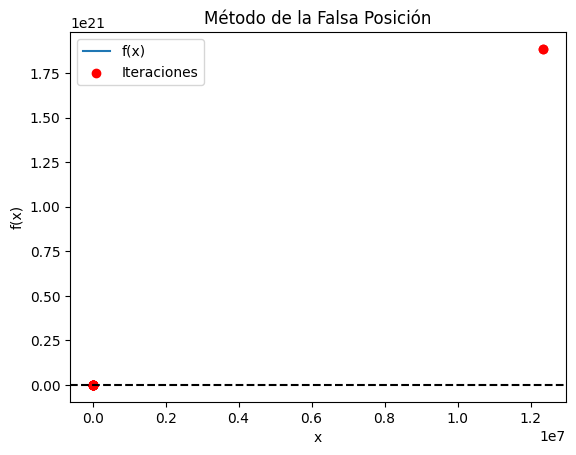


Tabla de datos:
+------------------+----------------------+----------------------+---------------------+-----------------------+
| Iteración        | a                    | b                    | Raíz aproximada     | Error                 |
+------------------+----------------------+----------------------+----------------------+----------------------+
|        1         |      0.00000000      |      4.00000000      |  12355161.12600322   |      4.00000000      |
|        2         |      2.50000000      |     -11.62500000     |  12355161.12600322   |     11.62500000      |
|        3         |      0.64000000      |      2.21414400      |  12355161.12600322   |      2.21414400      |
|        4         |      0.53760551      |      2.71028018      |  12355161.12600322   |      2.71028018      |
|        5         |      0.08064194      |      3.96800881      |  12355161.12600322   |      3.96800881      |
|        6         |     -1.12471908      |     -3.74772677      |  12355161.12

In [46]:
def falsaPosicion(funcion, a, b, tolerancia, maximo):
    x_valor = [a, b]
    y_valor = [funcion(a), funcion(b)]

    for i in range(maximo):
        x_nuevo = (a * y_valor[-1] - b * y_valor[-2]) / (y_valor[-1] - y_valor[-2])
        y_nuevo = funcion(x_nuevo)

        x_valor.append(x_nuevo)
        y_valor.append(y_nuevo)

        if y_nuevo == 0 or abs(x_valor[-1] - x_valor[-2]) < tolerancia:
            break
        elif y_valor[-1] * y_valor[-2] < 0:
            b = x_nuevo
        else:
            a = x_nuevo

    root = x_valor[-1]
    return root, x_valor, y_valor

# Función de ejemplo
def ejemplo(x):
    return x**3 - 5*x**2 + 4

a = 0.0
b = 2.5
tolerancia = 1e-6
maximo = 100

root, x_valor, y_valor = falsaPosicion(ejemplo, a, b, tolerancia, maximo)
print("Raíz aproximada:", root)

# Crear gráfica
x_rango = np.linspace(a, b, 400)
y_rango = ejemplo(x_rango)

plt.plot(x_rango, y_rango, label='f(x)')
plt.scatter(x_valor, y_valor, color='red', label='Iteraciones')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title('Método de la Falsa Posición')
plt.show()

# Crear tabla de datos
error = np.abs(np.array(y_valor))
print("\nTabla de datos:")
print("+------------------+----------------------+----------------------+---------------------+-----------------------+")
print("| Iteración        | a                    | b                    | Raíz aproximada     | Error                 |")
print("+------------------+----------------------+----------------------+----------------------+----------------------+")
for i in range(len(x_valor)):
    print(f"| {i+1:^16} | {x_valor[i]:^20.8f} | {y_valor[i]:^20.8f} | {root:^20.8f} | {error[i]:^20.8f} |")
print("+------------------+----------------------+----------------------+----------------------+----------------------+")


# **MÉTODO DE NEWTON RAPHSON**

Raíz aproximada: 2.0


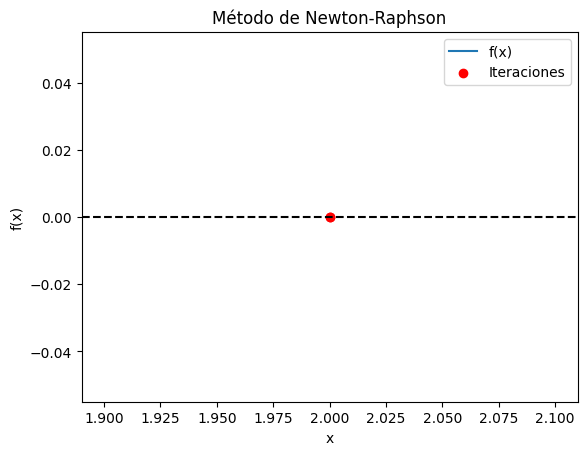


Tabla de datos:
+------------------+----------------------+----------------------+----------------------+
| Iteración        | x                    | f(x)                 | Error                |
+------------------+----------------------+----------------------+----------------------+
|        1         |      2.00000000      |    -154.00000000     |      0.00000000      |
|        2         |      2.00000000      |    -151.87970863     |      0.00000000      |
+------------------+----------------------+----------------------+----------------------+


In [48]:
def newtonRaphson(funcion, derivada, estimacionInicial, tolerance, maximo):
    x_valor = [estimacionInicial]

    for i in range(maximo):
        x_new = x_valor[-1] - funcion(x_valor[-1]) / derivada(x_valor[-1])
        x_valor.append(x_new)

        if abs(x_valor[-1] - x_valor[-2]) < tolerance:
            break

    root = x_valor[-1]
    return root, x_valor

# Función de ejemplo y su derivada
def ejemplo(x):
    return x**3 - x**2 - 4

def ejemploDerivada(x):
    return 2*np.sin(x)-(x**2)/10

estimacionInicial = 2.0
tolerancia = 1e-6
maximo = 100

root, x_valor = newtonRaphson(ejemplo, ejemploDerivada, estimacionInicial, tolerancia, maximo)
print("Raíz aproximada:", root)

# Crear gráfica
x_range = np.linspace(min(x_valor), max(x_valor), 400)
y_range = ejemplo(x_range)

plt.plot(x_range, y_range, label='f(x)')
plt.scatter(x_valor, [ejemplo(x) for x in x_valor], color='red', label='Iteraciones')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title('Método de Newton-Raphson')
plt.show()

# Calcular y mostrar errores
error = np.abs(np.array([ejemplo(x) for x in x_valor]))
print("\nTabla de datos:")
print("+------------------+----------------------+----------------------+----------------------+")
print("| Iteración        | x                    | f(x)                 | Error                |")
print("+------------------+----------------------+----------------------+----------------------+")
for i in range(len(x_valor)):
    print(f"| {i+1:^16} | {x_valor[i]:^20.8f} | {ejemplo(x_vals[i]):^20.8f} | {error[i]:^20.8f} |")
print("+------------------+----------------------+----------------------+----------------------+")


# **MÉTODO DE BÚSQUEDA ALEATORIA**

Mejor solución encontrada en x: -1.5642542752359443
Valor mínimo: -0.2458713881139034


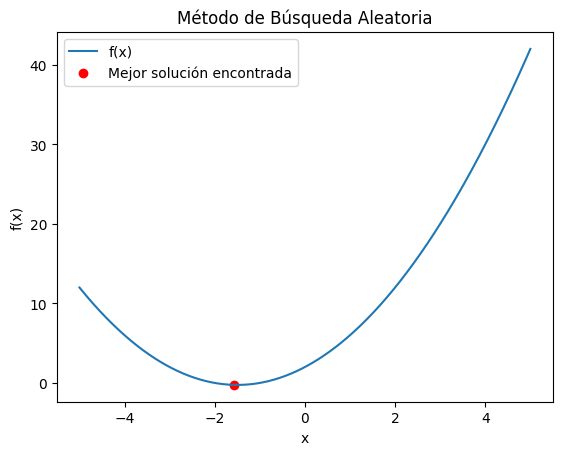


Tabla de datos:
+------------------+----------------------+----------------------+----------------------+
| Iteración        | Mejor solución (x)   | Valor mínimo (f(x))  | Error                |
+------------------+----------------------+----------------------+----------------------+
|      Final       |     -1.56425428      |     -0.24587139      |         N/A          |
+------------------+----------------------+----------------------+----------------------+


In [43]:
def random_search(function, search_range, num_samples):
    best_x = None
    best_y = float('inf')

    x_samples = np.random.uniform(search_range[0], search_range[1], num_samples)
    y_samples = function(x_samples)

    for i in range(num_samples):
        if y_samples[i] < best_y:
            best_x = x_samples[i]
            best_y = y_samples[i]

    return best_x, best_y

# Función de ejemplo
def example_function(x):
    return x**2 + 3*x + 2

search_range = (-5.0, 5.0)
num_samples = 100
max_iterations = 100

best_x, best_y = random_search(example_function, search_range, num_samples)
print("Mejor solución encontrada en x:", best_x)
print("Valor mínimo:", best_y)

# Crear gráfica
x_vals = np.linspace(search_range[0], search_range[1], 400)
y_vals = example_function(x_vals)

plt.plot(x_vals, y_vals, label='f(x)')
plt.scatter(best_x, best_y, color='red', label='Mejor solución encontrada')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title('Método de Búsqueda Aleatoria')
plt.show()

# Crear tabla de datos
error = np.abs(best_y - y_vals)
print("\nTabla de datos:")
print("+------------------+----------------------+----------------------+----------------------+")
print("| Iteración        | Mejor solución (x)   | Valor mínimo (f(x))  | Error                |")
print("+------------------+----------------------+----------------------+----------------------+")
print(f"| {'Final':^16} | {best_x:^20.8f} | {best_y:^20.8f} | {'N/A':^20} |")
print("+------------------+----------------------+----------------------+----------------------+")
